In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.network as network
import src.network_utils as net_utils

# Function Approximation

Another type of problem that can be solved using neural networks is a function approximation problem. Rather than having a finite number of classes that are to be classified, a function can be approximated over a region of values.  

The following examples show how this can be done in both the 1-dimensional and 2-dimensional cases. Note that since we are approximating the function over a range of values, the final activation function is ommited. This was tested using the sigmoid and ReLU activation functions and worked well in both cases.

## 1-Dimensional Case

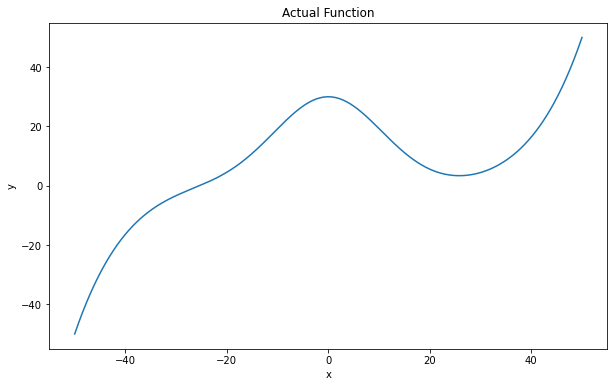

In [2]:
func = lambda x: (x/50)**4 * x + 30*np.exp(-(x/15)**2)
x_bounds = [-50, 50]
size = 10000
samples = 6000

x_data = np.linspace(x_bounds[0], x_bounds[1], size)
y_data = func(x_data)

plt.figure(figsize=(10,6))
plt.plot(x_data, y_data)
plt.title('Actual Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
max_x = np.max(abs(x_data))
max_y = np.max(abs(y_data))
x_data = x_data / max_x
y_data = y_data / max_y

index = np.random.permutation(len(x_data))
x_data_shuffled = x_data[index]
x_data_shuffled = x_data_shuffled[0:samples]
y_data_shuffled = y_data[index]
y_data_shuffled = y_data_shuffled[0:samples]

train_lim = int(samples*0.8)
train_data = x_data_shuffled[0:train_lim]
train_labels = y_data_shuffled[0:train_lim]
test_data = x_data_shuffled[train_lim:]
test_labels = y_data_shuffled[train_lim:]

In [4]:
mini_batch_size = 16
eta = 0.01
epochs = 250
error_disp = 50

net = network.Network([network.Linear(1, 50),
                       network.ReLU(),
                       network.Linear(50, 1)])

net.train(train_data, train_labels, mini_batch_size, eta, epochs, error_disp,
          test_data=test_data, test_labels=test_labels)

Error in epoch 1 / 250: 0.03193
Error in epoch 51 / 250: 0.00092
Error in epoch 101 / 250: 0.00041
Error in epoch 151 / 250: 0.00027
Error in epoch 201 / 250: 0.00019
Error in epoch 250 / 250: 0.00015


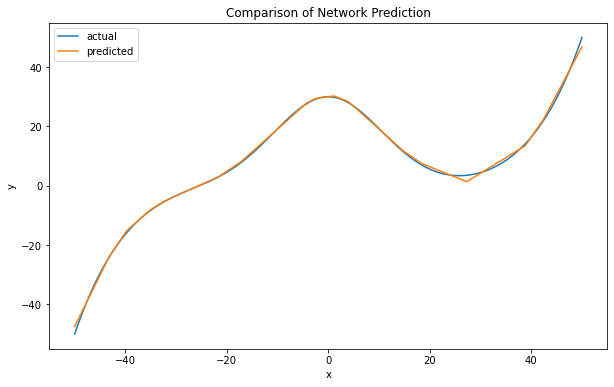

In [5]:
y_hat = np.array([net.forward_prop(x) for x in x_data])
x_data = x_data * max_x
y_data = y_data * max_y
y_hat = y_hat * max_y

plt.figure(figsize=(10,6))
plt.plot(x_data, y_data, label='actual')
plt.plot(x_data, y_hat[:,0,0], label='predicted')
plt.title('Comparison of Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 2-Dimensional Case

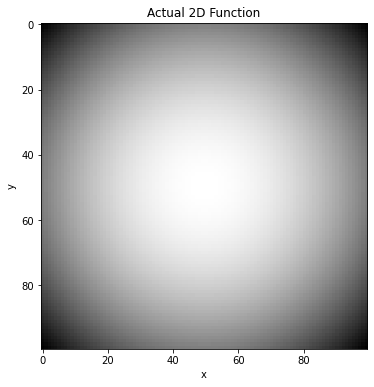

In [7]:
func = lambda x, y: x**2.0 + y**2.0
x_bounds = [-25, 25]
y_bounds = [-25, 25]
size = 100
samples = 6000

x_range = np.linspace(x_bounds[0], x_bounds[1], size)
y_range = np.linspace(y_bounds[0], y_bounds[1], size)
xx, yy = np.meshgrid(x_range, y_range)
zz = func(xx, yy)

xy_data = []
z_data = []
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        xy_data.append([[xx[i,j]], [yy[i,j]]])
        z_data.append([zz[i,j]])

xy_data = np.array(xy_data)
z_data = np.array(z_data)

plt.figure(figsize=(6,6))
plt.imshow(zz, cmap='gray_r')
plt.title('Actual 2D Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
max_xy = np.max(abs(xy_data))
max_z = np.max(abs(z_data))
xy_data = xy_data / max_xy
z_data = z_data / max_z

index = np.random.permutation(len(xy_data))
xy_data_shuffled = xy_data[index]
xy_data_shuffled = xy_data_shuffled[0:samples]
z_data_shuffled = z_data[index]
z_data_shuffled = z_data_shuffled[0:samples]

train_lim = int(samples*0.8)
train_data = xy_data_shuffled[0:train_lim]
train_labels = z_data_shuffled[0:train_lim]
test_data = xy_data_shuffled[train_lim:]
test_labels = z_data_shuffled[train_lim:]

In [9]:
mini_batch_size = 16
eta = 0.01
epochs = 250
error_disp = 50

net = network.Network([network.Linear(2, 50),
                       network.ReLU(),
                       network.Linear(50, 1)])

net.train(train_data, train_labels, mini_batch_size, eta, epochs, error_disp,
          test_data=test_data, test_labels=test_labels)

Error in epoch 1 / 250: 0.00708
Error in epoch 51 / 250: 0.00046
Error in epoch 101 / 250: 0.00024
Error in epoch 151 / 250: 0.00018
Error in epoch 201 / 250: 0.00015
Error in epoch 250 / 250: 0.00013


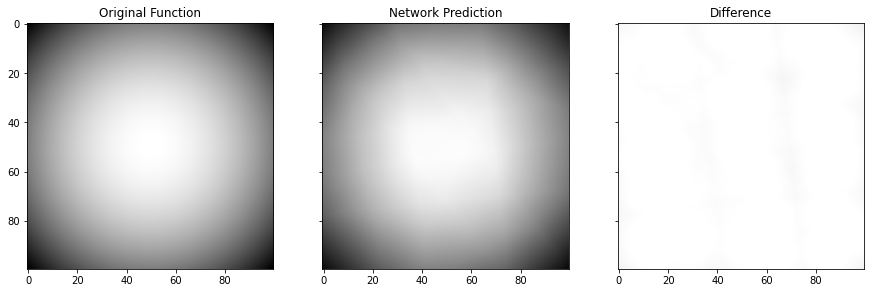

In [10]:
z_hat = np.array([net.forward_prop(xy) for xy in xy_data]).reshape(size,size)
xy_data = xy_data * max_xy
z_hat = z_hat * max_z

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,8))
ax1.imshow(zz, cmap='gray_r', vmin=np.min(zz), vmax=np.max(zz))
ax1.set_title('Original Function')
ax2.imshow(z_hat, cmap='gray_r', vmin=np.min(zz), vmax=np.max(zz))
ax2.set_title('Network Prediction')
ax3.imshow(zz - z_hat, cmap='gray_r', vmin=np.min(zz), vmax=np.max(zz))
ax3.set_title('Difference')
plt.show()